# A "kedvenc" zöldséged

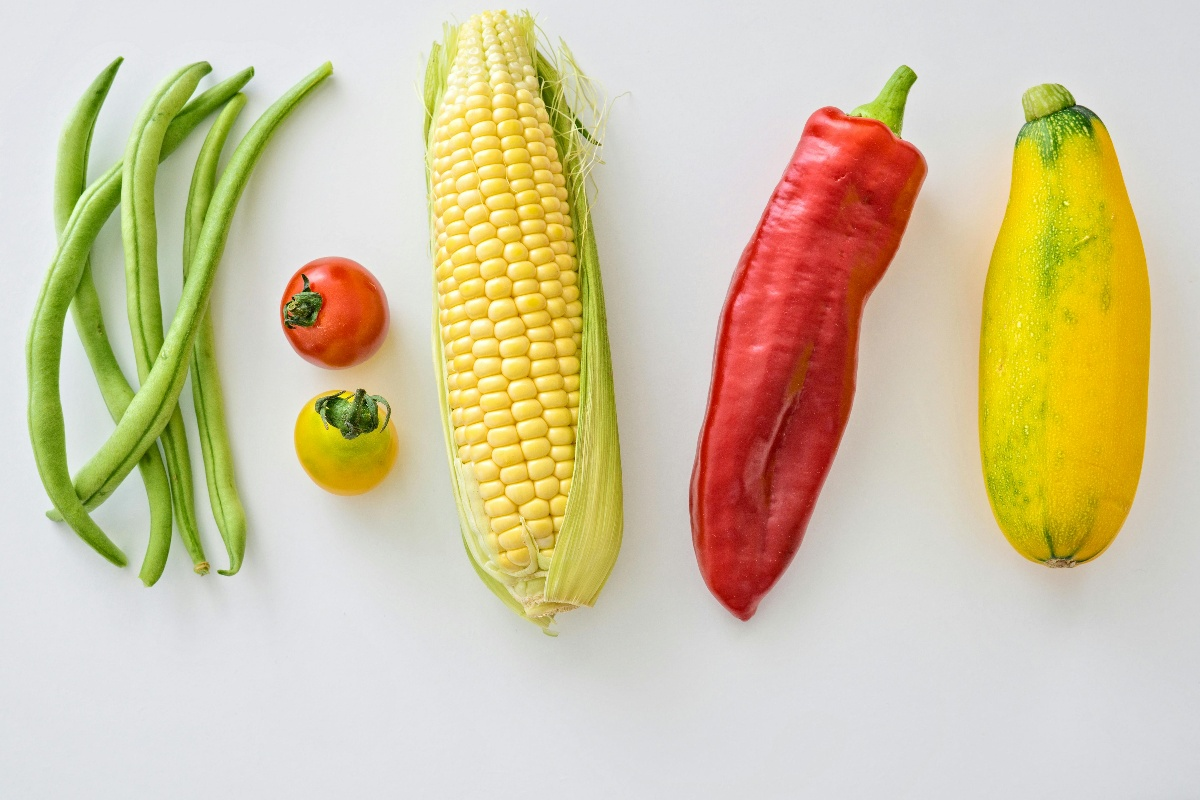

Avagy melyik zöldség áll hozzád **a legközelebb**?

A megoldáshoz a "MiDaS" egykamerás mélység becslő modellt fogjuk használni. (versenyen kívül: https://arxiv.org/abs/1907.01341v3)
- A modell igazából fordított output-ot ad, a maximális érték számít a legközelebbinek!
- segítségnek nézd meg a doksit: https://pytorch.org/hub/intelisl_midas_v2/

Válaszként add meg annak a zöldségnek nevét, amelyik a legközelebb van a kamerához(hozzád) a fenti képen!
(bab, paradicsom, kukorica, paprika, cukkini)

In [1]:
! pip install timm

In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.l

Loading weights:  None


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt
100%|██████████| 81.8M/81.8M [00:00<00:00, 235MB/s]


In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print('Model is loaded, running on:', device,'')

Model is loaded, running on: cpu 


In [5]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [6]:
! gdown 1Cm9dZdrHOvOy0YEp6bZ4_QzFfuACJJlF

Downloading...
From: https://drive.google.com/uc?id=1Cm9dZdrHOvOy0YEp6bZ4_QzFfuACJJlF
To: /content/vegetables_oitm2024.jpg
100% 259k/259k [00:00<00:00, 112MB/s]


In [7]:
img = cv2.imread('vegetables_oitm2024.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)

In [ ]:
with torch.no_grad():
  prediction = midas(input_batch)

  prediction = torch.nn.functional.interpolate(
      prediction.unsqueeze(1),
      size=img.shape[:2],
      mode="bicubic",
      align_corners=False,
  ).squeeze()

  output = prediction.cpu().numpy()

In [11]:
max_coords = np.unravel_index(np.argmax(output, axis=None), output.shape)
max_coords

(321, 1053)

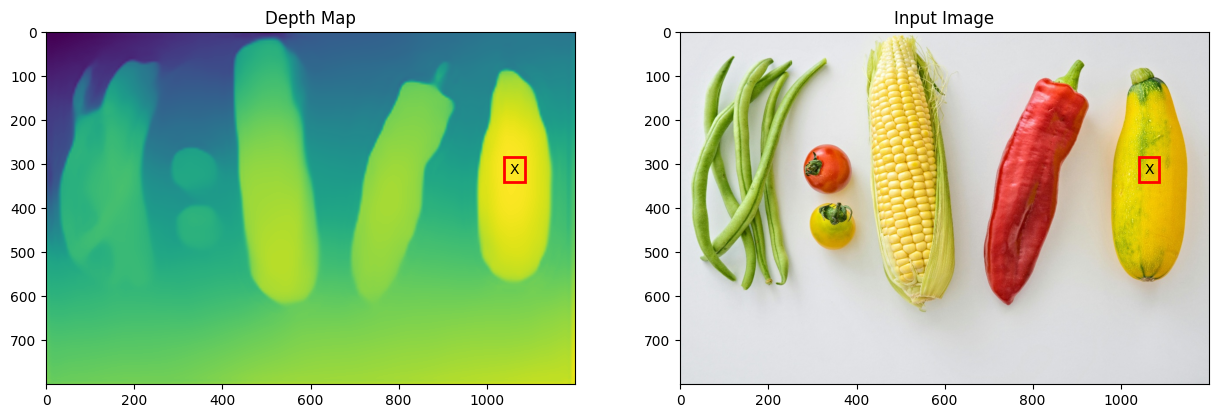

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(output)
plt.text(max_coords[1],max_coords[0],'X',bbox=dict(fill=False, edgecolor='red', linewidth=2))
plt.title('Depth Map')
plt.subplot(122)
plt.imshow(img)
plt.text(max_coords[1],max_coords[0],'X',bbox=dict(fill=False, edgecolor='red', linewidth=2))
plt.title('Input Image')
plt.show()